In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
import datasets

RANDOM_SEED = 69

# Emotions dataset

https://www.kaggle.com/datasets/nelgiriyewithana/emotions

Emotion labels: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [8]:
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)  # Remove @ mentions
    tweet = re.sub(r'#[A-Za-z0-9_]+', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', tweet)  # Remove non-alphabetic characters
    tweet = tweet.lower().strip()  # Lowercase and remove leading/trailing spaces
    return tweet

def clean_reddit_comment(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'(u\/|r\/)[A-Za-z0-9_]+', '', comment)  # Remove Reddit mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', comment)  # Remove non-alphabetic characters
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_reddit_comment_with_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'(u\/|r\/)[A-Za-z0-9_]+', '', comment)  # Remove Reddit mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = ''.join(char for char in comment if char.isalnum() or char.isspace() or char in ".,!?;:\'\"-()[]{}" or emoji.is_emoji(char))  # Keep only alphanumeric characters, spaces, punctuation and emojis
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_instagram_comment_without_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'@[A-Za-z0-9_]+', '', comment)  # Remove @ mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', comment)  # Remove non-alphabetic characters. currently also removing emojis, will change later
    comment = comment.replace('\n', ' ') # Replace newlines with spaces
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_instagram_comment_with_emoji(comment):
    comment = re.sub(r'http\S+', '', comment)  # Remove URLs
    comment = re.sub(r'@[A-Za-z0-9_]+', '', comment)  # Remove @ mentions
    comment = re.sub(r'#[A-Za-z0-9_]+', '', comment)  # Remove hashtags
    comment = ''.join(char for char in comment if char.isalnum() or char.isspace() or char in ".,!?;:'\"-()[]{}" or emoji.is_emoji(char))  # Keep only alphanumeric characters, spaces, punctuation and emojis
    comment = comment.replace('\n', ' ')  # Replace newlines with spaces
    comment = comment.lower().strip()  # Lowercase and remove leading/trailing spaces
    return comment

def clean_review(review):
    review = re.sub(r'http\S+', '', review)  # Remove URLs
    review = re.sub(r'<.*?>', ' ', review)  # Remove HTML tags like <br />
    review = re.sub(r'[^A-Za-z\s.,!?;:\'\"-]', '', review)  # Remove non-alphabetic characters
    review = review.lower().strip()  # Lowercase and remove leading/trailing spaces
    review = re.sub(r'\s+', ' ', review)  # Replace multiple spaces with a single space
    return review

In [18]:
emotions_data = pd.read_csv('Datasets/Original/emotions.csv')
print(f"Shape of emotions dataset: {emotions_data.shape}")
emotions_data.head()


Shape of emotions dataset: (416809, 2)


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [19]:
emotions_data['is_text_empty'] = emotions_data['text'].apply(lambda x: pd.isnull(x) or x == "")
empty_text_count = emotions_data['is_text_empty'].sum()
print("Total number of empty or NaN entries in 'text' column:", empty_text_count)
print("Shape of combined dataset before removing empty entries:", emotions_data.shape)

emotions_data = emotions_data[emotions_data['text'].notna() & (emotions_data['text'] != "")]
emotions_data = emotions_data.drop(['is_text_empty'], axis=1)
print("Shape of combined dataset after removing empty entries:", emotions_data.shape)

Total number of empty or NaN entries in 'text' column: 0
Shape of combined dataset before removing empty entries: (416809, 3)
Shape of combined dataset after removing empty entries: (416809, 2)


In [20]:
def has_emojis(df, column):
    """
    Check if a specific column in a pandas DataFrame contains emojis.

    Args:
        df (pd.DataFrame): The DataFrame to check.
        column (str): The name of the column to check for emojis.

    Returns:
        pd.Series: A boolean Series indicating rows containing emojis.
    """
    def contains_emoji(text):
        # Check if text contains any emoji
        return any(char in emoji.EMOJI_DATA for char in str(text))
    
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    return df[column].apply(contains_emoji)

In [21]:
emotions_data_emoji = emotions_data.copy()
emotions_data_emoji['has_emoji'] = has_emojis(emotions_data_emoji, 'text')
emotions_data_emoji['has_emoji'].value_counts()

has_emoji
False    416809
Name: count, dtype: int64

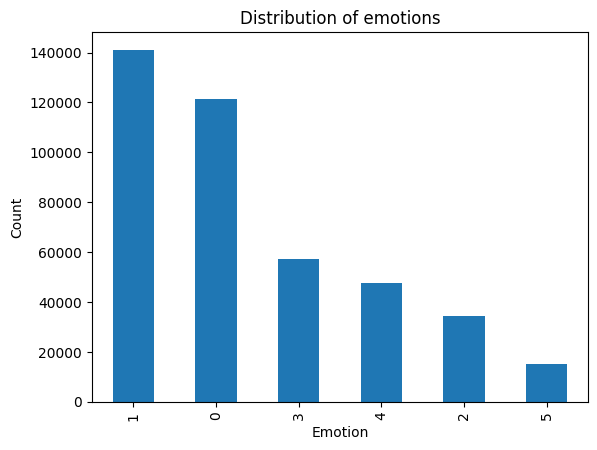

In [22]:
emotions_data['label'].value_counts().plot(kind='bar')
plt.title('Distribution of emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [23]:
emotions_data = emotions_data.rename(columns={'label': 'polarity'})
emotions_data['source'] = 'Twitter'
emotions_data.head()

,text,polarity,source
0,i just feel really helpless and heavy hearted,4,Twitter
1,ive enjoyed being able to slouch about relax a...,0,Twitter
2,i gave up my internship with the dmrg and am f...,4,Twitter
3,i dont know i feel so lost,0,Twitter
4,i am a kindergarten teacher and i am thoroughl...,4,Twitter


In [24]:
emotions_data['text'] = emotions_data['text'].apply(clean_tweet)
emotions_data.head()

,text,polarity,source
0,i just feel really helpless and heavy hearted,4,Twitter
1,ive enjoyed being able to slouch about relax a...,0,Twitter
2,i gave up my internship with the dmrg and am f...,4,Twitter
3,i dont know i feel so lost,0,Twitter
4,i am a kindergarten teacher and i am thoroughl...,4,Twitter


In [29]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Compute token lengths
def compute_token_length(text):
    encoded = tokenizer.encode(text, add_special_tokens=True)
    return len(encoded)

emotions_data['token_length'] = emotions_data['text'].apply(compute_token_length)

In [30]:
# Count entries exceeding thresholds
execeed_0 = len(emotions_data[emotions_data['token_length'] > 0])
exceed_100 = len(emotions_data[emotions_data['token_length'] > 100])
exceed_200 = len(emotions_data[emotions_data['token_length'] > 200])
exceed_300 = len(emotions_data[emotions_data['token_length'] > 300])
exceed_400 = len(emotions_data[emotions_data['token_length'] > 400])
exceed_500 = len(emotions_data[emotions_data['token_length'] > 500])

print(f"Number of entries exceeding 0 tokens: {execeed_0}")
print(f"Number of entries exceeding 100 tokens: {exceed_100}")
print(f"Number of entries exceeding 200 tokens: {exceed_200}")
print(f"Number of entries exceeding 300 tokens: {exceed_300}")
print(f"Number of entries exceeding 400 tokens: {exceed_400}")
print(f"Number of entries exceeding 500 tokens: {exceed_500}")

Number of entries exceeding 0 tokens: 416809
Number of entries exceeding 100 tokens: 6
Number of entries exceeding 200 tokens: 0
Number of entries exceeding 300 tokens: 0
Number of entries exceeding 400 tokens: 0
Number of entries exceeding 500 tokens: 0


In [32]:
emotions_data.to_csv('Datasets/Cleaned with tokens/emotions_dataset.csv', encoding='utf-8', index=False)